In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib.pyplot as plt
import numpy as nmp

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

In [3]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [4]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [The Shawshank Redemption...",9.235298787871038,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156158776906208,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989613188670404,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [The Godfather Part II], ...",8.984030330498879,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.95108501203963,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Everything Everywhere ...",8.005876895139743,"Dan Kwan (dir.), Michelle Yeoh, Stephanie Hsu",/title/tt6710474/
246,"[\n 247.\n , [The Iron Giant], \n, [...",8.005123150855615,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.004995195377452,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Aladdin], \n, [(1992)]...",8.004978719657155,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/


In [5]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [6]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [7]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [8]:
data.head()


,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.235298787871038,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156158776906208,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989613188670404,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather Part II], ...",8.984030330498879,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.95108501203963,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957


In [9]:
data.crew[1]


'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

***HW2***

Задача 1. Получить список всех участников команд (убрать постфикс (dir.) у директоров). Найти количество уникальных имен.

In [89]:
participants_list = []

for participant in data.crew:
  participant = participant.replace(" (dir.)", "").split(", ")
  for i in participant:
    participants_list.append(i)
        
participants_set = set(participants_list)
print("Всего имен в списке:", len(participants_list))
print("Количество уникальных имен:", len(participants_set))

Всего имен в списке: 750
Количество уникальных имен: 527


Задача 2. Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

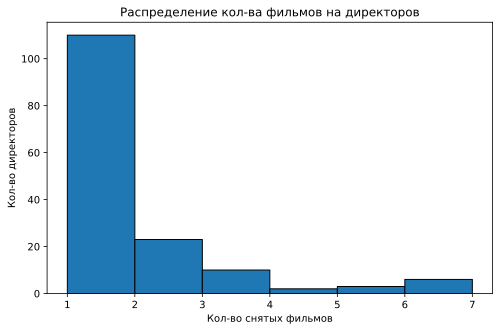

Директора, у которых больше всего фильмов в топе:, Martin Scorsese, Akira Kurosawa, Christopher Nolan, Steven Spielberg, Stanley Kubrick


In [95]:
dir_list = []
for director in data.crew:
  director = director.replace(" (dir.)", "").split(", ")
  dir_list.append(director[0])

dir_set = set(dir_list) 
data["directors"] = dir_list

vis = data["directors"].value_counts()
plt.hist(vis, edgecolor = "black", bins=6)
plt.title("Распределение кол-ва фильмов на директоров")
plt.xlabel("Кол-во снятых фильмов")
plt.ylabel("Кол-во директоров")
plt.show()


best_dirs = [i[0] for i in data["directors"].value_counts().items() if i[1] == 7]
print("Директора, у которых больше всего фильмов в топе:", *best_dirs, sep=", ") #от первой запятой так и не избавился(

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

Задача 4. Построить распределение топовых фильмов по годам

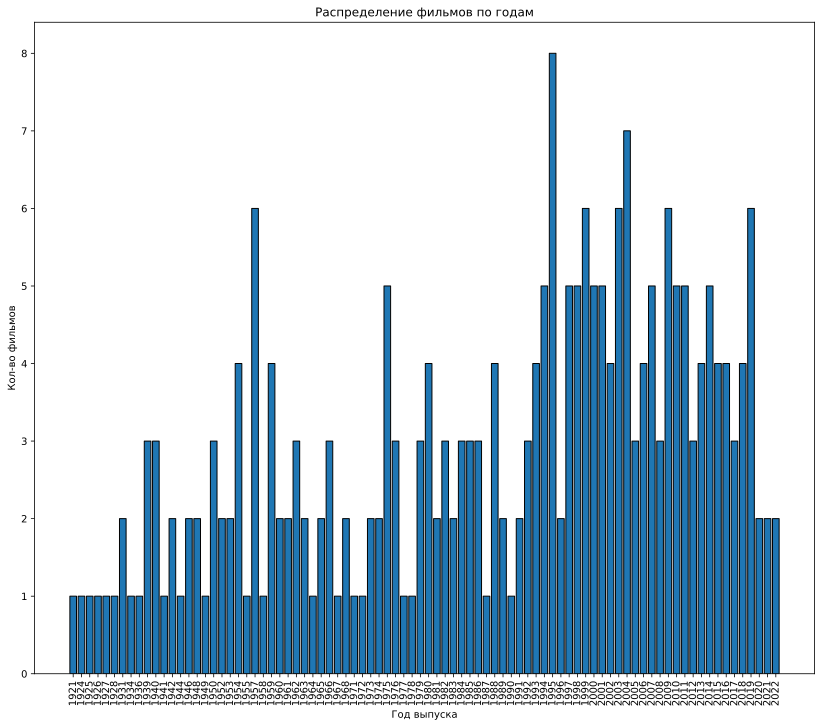

In [111]:
year = [data[0] for data in data["year"].value_counts().iteritems()]
year1 = [data[1] for data in data["year"].value_counts().iteritems()]
res = {"year":year, "year1": year1}
f_year = pd.DataFrame(res)
f_year = f_year.sort_values(by="year")

fig, ax = plt.subplots()
ax.bar(f_year["year"], f_year["year1"], edgecolor = "black")
plt.title("Распределение фильмов по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Кол-во фильмов")
plt.xticks(rotation=90)
fig.set_figwidth(14)
fig.set_figheight(12)
plt.show()

Задача 5. Построить распределение топовых фильмов рейтингу:

Округлить до сотых и отрисовать
Округлить до десятых и отрисовать
Округлить до целых и отрисовать

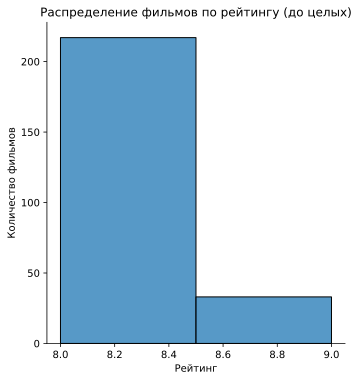

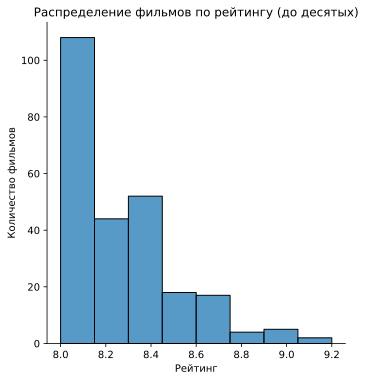

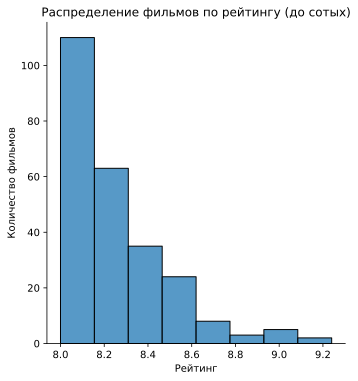

In [112]:
rating = pd.Series(data["ratings"]).to_list()
rating_string = nmp.array(rating)

vis1 = seaborn.displot(nmp.round(rating_string.astype(float), 0), bins = 2)
plt.title("Распределение фильмов по рейтингу (до целых)")
plt.xlabel("Рейтинг")
plt.ylabel("Количество фильмов")
plt.show()

vis2 = seaborn.displot(nmp.round(rating_string.astype(float), 1), bins = 8)
plt.title("Распределение фильмов по рейтингу (до десятых)")
plt.xlabel("Рейтинг")
plt.ylabel("Количество фильмов")
plt.show()

vis3 = seaborn.displot(nmp.round(rating_string.astype(float), 2), bins = 8)
plt.title("Распределение фильмов по рейтингу (до сотых)")
plt.xlabel("Рейтинг")
plt.ylabel("Количество фильмов")
plt.show()



Задача 6. Используйте ссылку http://www.imdb.com/ и динамически добавляя ссылку на фильм из колонки links соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.

In [14]:
#film_url = 'http://www.imdb.com/title/tt0068646/'
#html_text = requests.get(film_url).text
#soup = BeautifulSoup(html_text, 'lxml')
#soup.find_all(attrs={"name": "description"})[0].get("content")

In [ ]:
from fake_useragent import UserAgent #код выше выдавал ошибку, попробовал через иммитацию пользователя
ua = UserAgent()
url = "http://www.imdb.com"
headers = {"User-Agent": ua.random}
descr_lst = []

for i in data["links"]:
  film_url = url+i
  html_t = requests.get(film_url, headers=headers).text
  soup = BeautifulSoup(html_t, "lxml")
  descr_lst.append(soup.find("meta", attrs={"name": "description"}).get("content"))
    
data["describe"] = descr_lst

In [22]:
print(data["describe"])

0      The Shawshank Redemption: Directed by Frank Da...
1      The Godfather: Directed by Francis Ford Coppol...
2      The Dark Knight: Directed by Christopher Nolan...
3      The Godfather Part II: Directed by Francis For...
4      12 Angry Men: Directed by Sidney Lumet. With M...
                             ...                        
245    Everything Everywhere All at Once: Directed by...
246    The Iron Giant: Directed by Brad Bird. With Je...
247    The Help: Directed by Tate Taylor. With Emma S...
248    Aladdin: Directed by Ron Clements, John Musker...
249    Gandhi: Directed by Richard Attenborough. With...
Name: describe, Length: 250, dtype: object


Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with.

In [17]:
actors_from_descr = []
for act in data["describe"]:
  act = act.split("With")[1]
  act = re.split("\., ", act)[0]
  actors_from_descr.append(act)
data["actors_descr"] = actors_from_descr

print("Фильмов с актерами в описании:", len(actors_from_descr))
print(data.actors_descr[:5])

Фильмов с актерами в описании: 250
0     Tim Robbins, Morgan Freeman, Bob Gunton, Will...
1     Marlon Brando, Al Pacino, James Caan, Richard...
2     Christian Bale, Heath Ledger, Aaron Eckhart, ...
3     Al Pacino, Robert Duvall, Diane Keaton, Rober...
4     Martin Balsam, John Fiedler, Lee J. Cobb, E.G...
Name: actors_descr, dtype: object


Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:9.2 based on 2,554,919 user ratings. Из этого текста нужно достать = 2,554,919. Подсказка: используя метод find_all с аргументом attrs в который нужно передать {'class': 'ratingColumn imdbRating'} от страници http://www.imdb.com/chart/top. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.

In [64]:
top_url = "http://www.imdb.com/chart/top"
rev_html = requests.get(top_url).text
soup = BeautifulSoup(rev_html, "lxml")
rev = []
for _ in soup.find_all(attrs={"class": "ratingColumn imdbRating"}):
  s = _.find("strong").get("title")
  e = re.findall("(?<=on)(.*)(?=user)", s)
  rev.append(int(e[0].strip().replace(",", "")))
data["reviews"] = rev
print(data.reviews[:5])

0    2672452
1    1852167
2    2645315
3    1268188
4     789354
Name: reviews, dtype: int64


In [101]:
data_mov_rev = sorted(rev, reverse=True)
top_10 = data_mov_rev[:10]

for t in top_10:
  num_rev = data[data["reviews"] == t]
  print("Фильм", list(num_rev.title)[0], "получил", list(num_rev.reviews)[0], "оценок")

Фильм The Shawshank Redemption получил 2672452 оценок
Фильм The Dark Knight получил 2645315 оценок
Фильм Inception получил 2344840 оценок
Фильм Fight Club получил 2117894 оценок
Фильм Forrest Gump получил 2072339 оценок
Фильм Pulp Fiction получил 2047496 оценок
Фильм The Matrix получил 1908810 оценок
Фильм The Lord of the Rings: The Fellowship of the Ring получил 1871011 оценок
Фильм The Godfather получил 1852167 оценок
Фильм The Lord of the Rings: The Return of the King получил 1841767 оценок


Задача 9. Постройте топ 10 слов, которые встречаются

в названии фильмов

в описании фильмов

в названии и в описании фильмов

In [88]:
topw_title = []
topw_descr = []


for i in range(len(data["title"])):
  tpt = data["title"][i].lower().split()
  topw_title += tpt
tpt1 = pd.Series(topw_title)
print("Топ 10 слов в названиях фильмов:")
print(tpt1.value_counts().nlargest(10))

for ii in range(len(data["describe"])):
  tpd = data["describe"][ii].lower().split()
  topw_descr += tpd
tpd1 = pd.Series(topw_descr)
print("\n Топ 10 слов в описаниях фильмов:")
print(tpd1.value_counts().nlargest(10))

topw_tit_des = topw_title + topw_descr
ttd = pd.Series(topw_tit_des)
print("\n Топ 10 слов в описаниях и названиях фильмов:")
print(ttd.value_counts().nlargest(10))

Топ 10 слов в названиях фильмов:
the     94
of      30
a       12
and     10
to       7
for      6
in       5
wild     3
my       3
once     3
dtype: int64

 Топ 10 слов в описаниях фильмов:
the         453
a           407
with        313
by          295
directed    250
to          237
of          235
and         186
in          155
his         144
dtype: int64

 Топ 10 слов в описаниях и названиях фильмов:
the         547
a           419
with        314
by          297
of          265
directed    250
to          244
and         196
in          160
his         144
dtype: int64


Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для The Godfather ожидается получить список из Crime, Drama. (Можно увидеть эти теги по картинкой к фильму)